<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML-using-keras/blob/master/income_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# google colab에 gdrive mount 하기(아래 링크 클릭후, 내용 복사 후 입력하기)
# 12시간 지나면 자동으로 해제되어서 지속적으로 로그인을 해주어야 한다.
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.utils import to_categorical
from collections import Counter
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [6]:
# age: a, workclass: w, fnlwgt:f, education:e 
# education-num:ed, marital-status:m, occupation:o,
# relationship: r,race: ra, sex:s, capital-gain:c,
# capital-loss:ca, native-country:n , 5k:소득이상 
df  = pd.read_csv("/content/gdrive/My Drive/data/adult.data",index_col=False, 
                  names=['a', 'w', 'f', 'e', 'ed', 'm', 'o', 'r', 
                         'ra', 's', 'c', 'ca', 'h', 'n', '5k'])
df.head()

,a,w,f,e,ed,m,o,r,ra,s,c,ca,h,n,5k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.count()

a     32561
w     32561
f     32561
e     32561
ed    32561
m     32561
o     32561
r     32561
ra    32561
s     32561
c     32561
ca    32561
h     32561
n     32561
5k    32561
dtype: int64

In [9]:
df.isnull()

,a,w,f,e,ed,m,o,r,ra,s,c,ca,h,n,5k
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


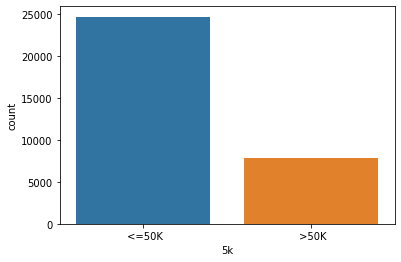

In [10]:
# 소득이 5만 달러 이상 분포
sns.countplot('5k',data=df)

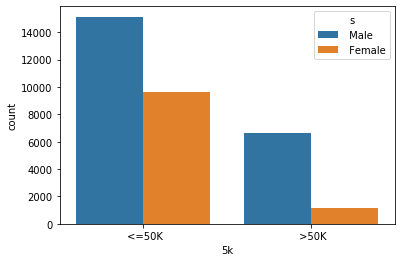

In [11]:
# 소득이 5만 달러이상 분포에서 성별 구분 추가
sns.countplot('5k',hue='s',data=df)

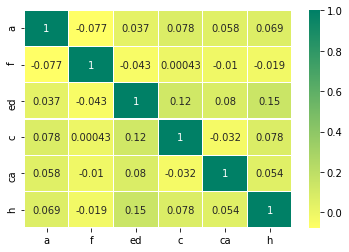

In [12]:
# 서로의 컬럼별 연관도를 확인하는 chart
sns.heatmap(df.corr(),annot=True, cmap='summer_r', linewidths=0.2)

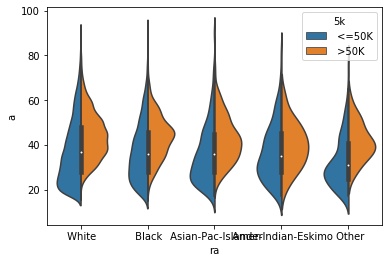

In [13]:
# 나이,인종별 소득 5만달러 이상인 사람 분포. 
sns.violinplot("ra","a", hue="5k", data=df, split=True)

In [0]:
#Y의 데이터를 배열로 만들어주기.
Y = df['5k'].values.tolist()
Y = [0 if i == ' <=50K' else 1 for i in Y]
# 출력 Y를 딥러닝에 맞는 출력으로 바꾸어준다.
Y = to_categorical(Y)

In [0]:
# 숫자가 들어간 컬럼 제거하기.
X = df.drop(['a', 'f', 'ed', 'c', 'ca', 'h'], axis=1)

# one-hot encoding | 컬럼 종류별로 추가로 열 만들기
X = pd.get_dummies(X, drop_first=True)
X = pd.concat([X, df[['a', 'f', 'ed', 'c', 'ca', 'h']]], axis=1)

In [0]:
# scaler 함수 데이터의 크기 범위를 0~1사이로 만들어줌.
scaler = MinMaxScaler()
X[['a', 'f', 'ed', 'c', 'ca', 'h']] = scaler.fit_transform(X[['a', 'f', 'ed', 'c', 'ca', 'h']])


In [0]:
# train set 구성
X_train = X[:-1000] # 마지막 1000개 제외
X_test  = X[-1000:] # 마지막부터 1000개

Y_train = Y[:-1000]
Y_test  = Y[-1000:]


In [11]:
# layer가 2048, 256이 추가되었다. 추가되기 전에는 정답률이 82%였다. 지금은 100%가 되었다.
model = Sequential()
model.add(Dense(2048, input_shape=(101,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              208896    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 1,422,466
Trainable params: 1,422,466
Non-trainable params: 0
_________________________________________________________________


In [12]:
# colab 사용시 GPU 모드는 무료 제공이라 컴파일에 엄청난 속도 차이를 보여준다.
# 기존의 CPU 시 1epoch에 24초 GPU 모드를 사용할시 4초가 걸린다.
# 현재로는 TPU는 제공이 되고 있지 않는거 같다.
# accuracy 정확도를 컴파일 과정 중에 확인
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# X_train <--- 0.2
hist = model.fit(X_train,Y_train,epochs=5,validation_split=0.2)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 25248 samples, validate on 6313 samples
Epoch 1/5





25248/25248 [==============================] - 14s 548us/step - loss: 0.0103 - acc: 0.9950 - val_loss: 1.7011e-07 - val_acc: 1.0000
Epoch 2/5
25248/25248 [==============================] - 4s 154us/step - loss: 1.6312e-07 - acc: 1.0000 - val_loss: 1.4540e-07 - val_acc: 1.0000
Epoch 3/5
25248/25248 [==============================] - 4s 152us/step - loss: 1.4337e-07 - acc: 1.0000 - val_loss: 1.3661e-07 - val_acc: 1.0000
Epoch 4/5
25248/25248 [==============================] - 4s 153us/step - loss: 1.3446e-07 - acc: 1.0000 - val_loss: 1.3096e-07 - val_acc: 1.0000
Epoch 5/5
25248/25248 [==============================] - 4s 153us/step - loss: 1.2903e-07 - acc: 1.0000 - val_loss: 1.2695e-07 - val_acc: 1.0000


In [13]:
print(hist.history)

{'val_loss': [1.7010911142893014e-07, 1.4540038559325654e-07, 1.3661022439746658e-07, 1.3096412018693873e-07, 1.2695142502460743e-07], 'val_acc': [1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.010291767522373022, 1.631153426372193e-07, 1.4336723362350465e-07, 1.3445523207021407e-07, 1.290301455429e-07], 'acc': [0.9949698986058302, 1.0, 1.0, 1.0, 1.0]}


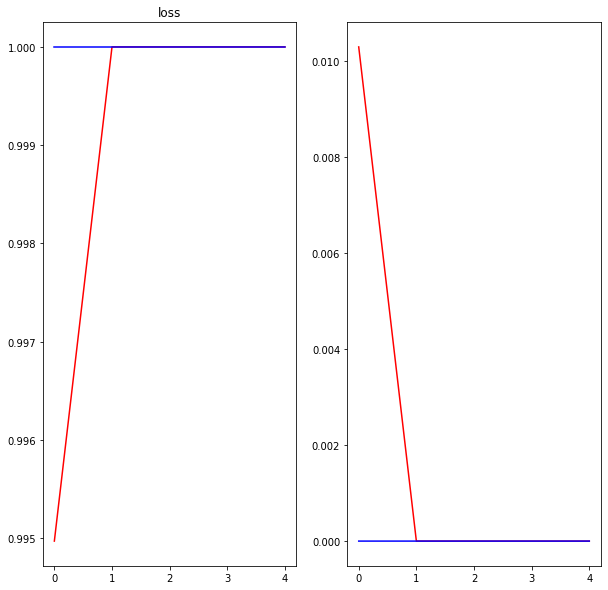

In [14]:
# 에러를 확인하는 코드(그래프로 모델이 잘 동작하는지 확인 가능하다.)
# acc에서 acc와 val_acc값이 서로 반대 방향으로 증가하면 overfitting이 된다.
# 그 뜻은 주어진 데이터에서는 예측을 잘하지만 주어지지 않는 값은 예측을 잘하지 못하는 유연하지 못한 상태가
# 된다.
plt.figure(figsize=(10,10))
plt.title('acc')
plt.subplot(1, 2, 1)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')

plt.title('loss')
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.show()


In [15]:
score = model.evaluate(X_test,Y_test)
print(score)

1000/1000 [==============================] - 0s 48us/step
[1.2612344937679155e-07, 1.0]
